In [49]:
import pandas as pd 
import numpy as np
from sklearn import *
%matplotlib inline

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
# Conv1D + LSTM
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.layers import Flatten

In [51]:
df=pd.read_csv("kddcup.data_10_percent_corrected",header=None)

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [53]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [54]:
df.columns =['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']

In [55]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Category
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [56]:
df.shape

(494021, 42)

In [57]:
#Analyzing the Dataset
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['Category'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))


Read 494021 rows.
The number of data points are: 494021
The number of features are: 42
The different type of output labels are: {'warezmaster.', 'teardrop.', 'imap.', 'spy.', 'ipsweep.', 'multihop.', 'phf.', 'back.', 'buffer_overflow.', 'land.', 'guess_passwd.', 'normal.', 'loadmodule.', 'nmap.', 'ftp_write.', 'warezclient.', 'portsweep.', 'rootkit.', 'neptune.', 'perl.', 'smurf.', 'satan.', 'pod.'}
The number of different output labels are: 23


In [58]:
# Data Cleaning
# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)
df.dropna(inplace=True,axis=1)

Null values in dataset are 0


In [59]:
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

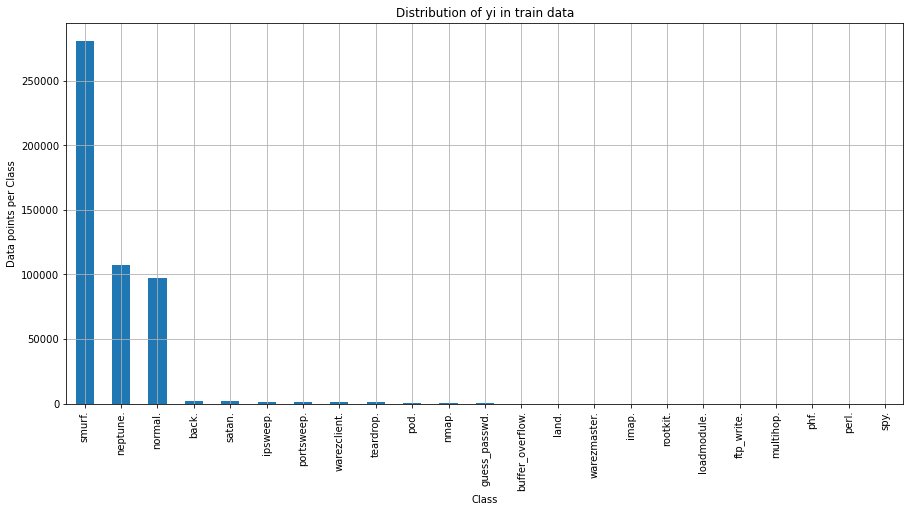

In [60]:
## Exploratory data analysis
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Category'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [61]:
def change_label(df):
    df.Category.replace(['back.','land.','neptune.','pod.','smurf.','teardrop.'],'Dos',inplace=True)
    df.Category.replace(['guess_passwd.','imap.','ftp_write.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)      
    df.Category.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe',inplace=True)
    df.Category.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)

In [62]:
change_label(df)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [63]:
df.Category.value_counts()

Dos        391458
normal.     97278
Probe        4107
R2L          1126
U2R            52
Name: Category, dtype: int64

In [64]:
df_c=df.copy()

In [65]:
# one -hot coding for object dtypes
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [66]:
encode_text_dummy(df_c, 'protocol_type')

In [67]:
encode_text_dummy(df_c, 'service')
encode_text_dummy(df_c, 'flag')

In [68]:
df_c.dtypes


duration          int64
src_bytes         int64
dst_bytes         int64
land              int64
wrong_fragment    int64
                  ...  
flag-S1           uint8
flag-S2           uint8
flag-S3           uint8
flag-SF           uint8
flag-SH           uint8
Length: 117, dtype: object

In [69]:
# normalization
def min_max_scaling(df,name):
    df[name] = (df[name] - df[name].min()) / (df[name].max() - df[name].min())

In [70]:
min_max_scaling(df_c, 'duration')

In [71]:
X = df_c.select_dtypes(include=[np.float64, np.int64])

In [72]:
X.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [73]:
min_max_scaling(df_c, 'src_bytes')
min_max_scaling(df_c, 'dst_bytes')
min_max_scaling(df_c, 'land')
min_max_scaling(df_c, 'wrong_fragment')
min_max_scaling(df_c, 'urgent')
min_max_scaling(df_c, 'hot')
min_max_scaling(df_c, 'num_failed_logins')
min_max_scaling(df_c, 'logged_in')
min_max_scaling(df_c, 'num_compromised')
min_max_scaling(df_c, 'root_shell')
min_max_scaling(df_c, 'su_attempted')
min_max_scaling(df_c, 'num_root')
min_max_scaling(df_c, 'num_file_creations')
min_max_scaling(df_c, 'num_shells')
min_max_scaling(df_c, 'num_access_files')
#min_max_scaling(df_c, 'is_host_login')
min_max_scaling(df_c, 'is_guest_login')
min_max_scaling(df_c, 'count')

In [74]:
min_max_scaling(df_c, 'srv_count')
min_max_scaling(df_c, 'serror_rate')
min_max_scaling(df_c, 'srv_serror_rate')
min_max_scaling(df_c, 'rerror_rate')
min_max_scaling(df_c, 'srv_rerror_rate')
min_max_scaling(df_c, 'same_srv_rate')
min_max_scaling(df_c, 'diff_srv_rate')
min_max_scaling(df_c, 'srv_diff_host_rate')
min_max_scaling(df_c, 'dst_host_count')
min_max_scaling(df_c, 'diff_srv_rate')     
min_max_scaling(df_c, 'srv_diff_host_rate')
min_max_scaling(df_c, 'dst_host_count')
min_max_scaling(df_c, 'dst_host_srv_count')
min_max_scaling(df_c, 'dst_host_same_srv_rate')
min_max_scaling(df_c, 'dst_host_diff_srv_rate')
min_max_scaling(df_c, 'dst_host_same_src_port_rate')
min_max_scaling(df_c, 'dst_host_srv_diff_host_rate')
min_max_scaling(df_c, 'dst_host_serror_rate')
min_max_scaling(df_c, 'dst_host_srv_serror_rate')
min_max_scaling(df_c, 'dst_host_rerror_rate')
min_max_scaling(df_c, 'dst_host_srv_rerror_rate')

In [75]:
df_c.dropna(inplace=True,axis=1)

In [76]:
# Convert to numpy - Classification
x_columns = df_c.columns.drop('Category')
x = df_c[x_columns].values
dummies = pd.get_dummies(df_c['Category']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
multi_label = pd.DataFrame(df_c.Category)

In [79]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
df_c['Category'] = enc_label
#y_mul = multi_data['intrusion']
df_c

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
494017,0.0,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
494018,0.0,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
494019,0.0,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
df_c['Category']

0         4
1         4
2         4
3         4
4         4
         ..
494016    4
494017    4
494018    4
494019    4
494020    4
Name: Category, Length: 494021, dtype: int32

In [81]:
x_columns = df_c.columns.drop('Category')
x = df_c[x_columns].values
y=df_c['Category'].values

In [82]:
x

array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [83]:
y

array([4, 4, 4, ..., 4, 4, 4])

In [84]:
y_train_multi= df_c[['Category']]
X_train_multi= df_c.drop(labels=['Category'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (494021, 116) 
y_train has shape: (494021, 1)


In [85]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [86]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [87]:
from sklearn.model_selection import train_test_split 

In [88]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)


In [89]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(395216, 116, 1)

In [90]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(98805, 116, 1)

In [91]:
def model():
    model = Sequential()
    model.add(Conv1D(16,2,activation='relu',padding='same',input_shape = (X_test.shape[1], 1)))
    model.add(Conv1D(16,2,activation='relu',padding='same'))
    model.add(MaxPooling1D(1))
    
    model.add(Conv1D(32,2,activation='relu',padding='same'))
    model.add(Conv1D(32,2,activation='relu',padding='same'))
    model.add(MaxPooling1D(1))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(5,activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    #model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[keras.metrics.AUC(name='auc')])
    return model

In [92]:
learning_rate=0.001
#batch_size=40
epochs = 25

In [93]:
model = model()

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 116, 16)           48        
                                                                 
 conv1d_5 (Conv1D)           (None, 116, 16)           528       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 116, 16)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 116, 32)           1056      
                                                                 
 conv1d_7 (Conv1D)           (None, 116, 32)           2080      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 116, 32)          0         
 1D)                                                  

In [95]:
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)

In [96]:
history = model.fit(X_train, y_train, epochs=25, batch_size=500,validation_split=0.2,callbacks = [early_stop])

Epoch 1/25
633/633 [==============================] - 75s 117ms/step - loss: 0.0443 - auc: 0.9978 - val_loss: 0.0066 - val_auc: 0.9998
Epoch 2/25
633/633 [==============================] - 66s 104ms/step - loss: 0.0055 - auc: 0.9998 - val_loss: 0.0026 - val_auc: 0.9998
Epoch 3/25
633/633 [==============================] - 66s 104ms/step - loss: 0.0036 - auc: 0.9999 - val_loss: 0.0021 - val_auc: 0.9998
Epoch 4/25
633/633 [==============================] - 66s 104ms/step - loss: 0.0030 - auc: 0.9999 - val_loss: 0.0023 - val_auc: 0.9998
Epoch 5/25
633/633 [==============================] - 68s 108ms/step - loss: 0.0027 - auc: 0.9999 - val_loss: 0.0020 - val_auc: 0.9999
Epoch 6/25
633/633 [==============================] - 67s 105ms/step - loss: 0.0026 - auc: 0.9999 - val_loss: 0.0018 - val_auc: 0.9999
Epoch 7/25
633/633 [==============================] - 66s 105ms/step - loss: 0.0023 - auc: 0.9999 - val_loss: 0.0017 - val_auc: 0.9998
Epoch 8/25
633/633 [==============================] - 6

In [ ]:
model.save("path_cnn")

In [97]:
model = keras.models.load_model("path_cnn")

In [98]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

3088/3088 [==============================] - 10s 3ms/step - loss: 9.8546e-04 - auc: 0.9999: 3s - loss: 8.4188e-04 -  - ETA: 3s - loss: 9.5745e-04 - auc - ETA: 2s - - ETA: 1s - loss: 0.0010 - au - ETA: 1s - loss:
Test results - Loss: 0.0009854588424786925 - Accuracy: 99.99399781227112%


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [100]:
from keras.utils.vis_utils import plot_model

In [101]:
keras.utils.plot_model(model, "multi_input_cnn.png", show_shapes=True)

AttributeError: module 'keras.utils' has no attribute 'plot_model'

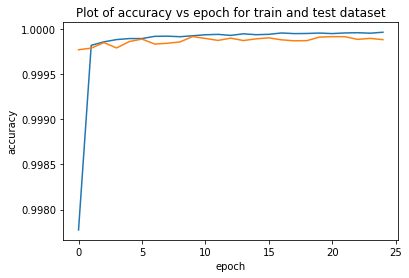

In [102]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [103]:
model.metrics_names

['loss', 'auc']

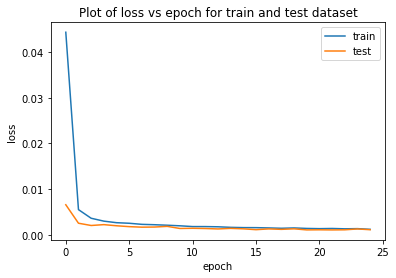

In [104]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [108]:
# extract features from cnn
modelfeatured=models.Model(inputs=model.input,outputs=model.get_layer('flatten').output)

In [106]:
from tensorflow.keras import models

In [ ]:
train_featured=modelfeatured.predict(X_train)

In [109]:
# build lstm model
X_train_lstm = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
print(X_train_lstm.shape)
X_test_lstm = np.reshape(X_test, (X_test.shape[0],1, X_test.shape[1]))
print(X_test_lstm.shape)

(395216, 1, 116)
(98805, 1, 116)


In [110]:
def model_1():
    model_1 = Sequential()
    #model_1.add(Dense(units = 64,input_shape=X_train_lstm[0].shape,activation='relu'))
    #model_1.add(Dropout(0.15))
    model_1.add(LSTM(units=64,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2]),
                dropout=0.5, activation='relu'))

    #model_1.add(Dense(units=5,activation='sigmoid'))
    model_1.add(Dense(5))
    
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model_1
    

In [112]:
from tensorflow import keras

In [113]:
model_1 = model_1()

In [114]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                46336     
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 46,661
Trainable params: 46,661
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_1.fit(X_train_lstm, y_train, epochs=50, batch_size=500,validation_split=0.2,callbacks = [early_stop])

Epoch 1/50
633/633 [==============================] - 6s 5ms/step - loss: 0.8923 - accuracy: 0.7519 - val_loss: 0.4125 - val_accuracy: 0.9375
Epoch 2/50
633/633 [==============================] - 3s 5ms/step - loss: 0.3729 - accuracy: 0.8853 - val_loss: 0.2875 - val_accuracy: 0.9769
Epoch 3/50
633/633 [==============================] - 3s 5ms/step - loss: 0.2486 - accuracy: 0.9108 - val_loss: 0.1667 - val_accuracy: 0.9681
Epoch 4/50
633/633 [==============================] - 3s 5ms/step - loss: 0.1628 - accuracy: 0.9207 - val_loss: 0.0944 - val_accuracy: 0.9705
Epoch 5/50
633/633 [==============================] - 3s 5ms/step - loss: 0.1271 - accuracy: 0.9324 - val_loss: 0.0761 - val_accuracy: 0.9779
Epoch 6/50
633/633 [==============================] - 3s 5ms/step - loss: 0.1063 - accuracy: 0.9434 - val_loss: 0.0517 - val_accuracy: 0.9800
Epoch 7/50
633/633 [==============================] - 3s 5ms/step - loss: 0.0921 - accuracy: 0.9482 - val_loss: 0.0454 - val_accuracy: 0.9813
Epoch 

In [117]:
model_1.save("path_lstm123")

INFO:tensorflow:Assets written to: path_lstm123\assets


INFO:tensorflow:Assets written to: path_lstm123\assets


In [118]:
model_1 = keras.models.load_model("path_lstm123")

In [119]:
# predicting target attribute on testing dataset
test_results1 = model_1.evaluate(X_test_lstm, y_test, verbose=1)
print(f'Test results - Loss: {test_results1[0]} - Accuracy: {test_results1[1]*100}%')

3088/3088 [==============================] - 4s 1ms/step - loss: 0.0303 - accuracy: 0.9851
Test results - Loss: 0.030265575274825096 - Accuracy: 98.50817322731018%


In [121]:
keras.utils.plot_model(model_1, "model_lstm.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
# CNN-LSTM
